In [1]:
from copy import deepcopy
from scipy.spatial import distance 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']= (16,9)
plt.style.use('ggplot')


In [2]:
#importing daata set
data= pd.read_csv('Data dummy.csv')
print(data.shape)
data.head()

(23, 6)


,Nama Produk,Jumlah Stok,Stok Keluar,Keuntungan,Harga Beli,Harga Jual
0,Habbatussauda Extra Propolis Trigon,109,41,54.166667,55000,120000
1,Habbatussauda Oil 200 Kapsul,99,16,55.000000,45000,100000
2,Habasyi Oil 100 Kps,85,16,50.000000,24000,48000
3,Habasyi Oil 210 Kps,81,18,50.000000,45000,90000
4,Kapsul Habbatus Sauda,81,30,58.333333,10000,24000


In [5]:
f1= data['Jumlah Stok'].values
f2= data['Stok Keluar'].values
f3= data['Keuntungan'].values
X = np.array(list(zip(f1,f2,f3)))
print(data['Nama Produk'].values)

['Habbatussauda Extra Propolis Trigon' 'Habbatussauda Oil 200 Kapsul'
 'Habasyi Oil 100 Kps' 'Habasyi Oil 210 Kps' 'Kapsul Habbatus Sauda'
 'Habat Oil 369' 'Habbatussauda Al-Afiat 100 Kps'
 'Habbatussauda Al-Afiat 200 Kps' 'Habbatussauda Oil Al-Afiat 100 Kps'
 'Habbatussauda Oil Al-Afiat 200 Kps' 'Habbatussauda Oil Al-Afiat 60 Kps'
 'Propolis Brazalian / Botol' 'Propolis Diamond Lite 20 / Botol'
 'Propolis Diamond Regular / Botol' 'Propolis Melia Nature / Botol'
 'Propolis Melia Sehat / Botol' 'Propolis Prosmart/ Botol'
 'Madu Al-Kautsar' 'Madu Batuk Al-Wadey' 'Madu for Mama Al Mabruroh'
 'Madu Hitam Pahit 460 gram' 'Madu Hutan Liar Al Wadey 500 Gram'
 'Madu Hutan Sialang 1 Kg']


In [6]:
#Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [15]:
k=4
C_w = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size=k)
C_x = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size=k)
C_y = np.random.randint(np.min(X[:,2]), np.max(X[:,2]), size=k)
C= np.array(list(zip(C_w,C_x,C_y)), dtype=np.float32)
C

array([[ 82.,  22.,  45.],
       [113.,  17.,  43.],
       [ 91.,  21.,  48.],
       [108.,  21.,  42.]], dtype=float32)

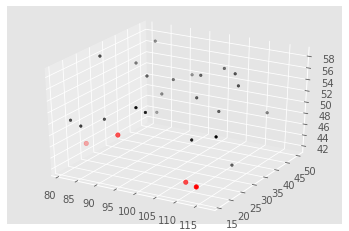

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1,f2,f3, c='black', s=7)
ax.scatter(C[:,0],C[:,1],C[:,2], c='red', s=20)

In [17]:
C_old=np.zeros((C.shape))
#label
clusters = np.zeros(len(X))
error = dist(C,C_old)
counter=1
print(X)
while counter <100:
    print("C")
    print(C)
    for i in range(len(X)):
        distance=dist(X[i],C)
        print("dist")
        print(distance)
        cluster = np.argmin(distance)
        print("cluster")
        print(cluster)
        clusters[i] = cluster
    #storing old centroid
    C_old=deepcopy(C)
    #finding the new centroid
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        print("points")
        print(points)
        C[i]=np.mean(points,axis=0)
        print(C[i])
    error = dist(C,C_old)
    counter+=1

[[109.          41.          54.16666667]
 [ 99.          16.          55.        ]
 [ 85.          16.          50.        ]
 [ 81.          18.          50.        ]
 [ 81.          30.          58.33333333]
 [ 83.          49.          57.14285714]
 [113.          32.          42.85714286]
 [110.          20.          50.        ]
 [106.          38.          50.        ]
 [ 99.          42.          54.54545455]
 [ 89.          42.          50.        ]
 [ 92.          50.          52.        ]
 [ 89.          36.          54.54545455]
 [101.          37.          52.        ]
 [102.          47.          55.        ]
 [ 87.          22.          50.        ]
 [ 83.          41.          55.        ]
 [107.          43.          55.55555556]
 [ 87.          43.          46.15384615]
 [100.          18.          53.84615385]
 [ 92.          42.          52.94117647]
 [112.          49.          47.91666667]
 [117.          18.          52.        ]]
C
[[ 82.  22.  45.]
 [113.  17.  

[87.85714  43.285713 52.540478]
points
[array([99., 16., 55.]), array([110.,  20.,  50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[106.5      18.       52.71154]
points
[array([85., 16., 50.]), array([81., 18., 50.]), array([81.        , 30.        , 58.33333333]), array([87., 22., 50.])]
[83.5      21.5      52.083332]
points
[array([109.        ,  41.        ,  54.16666667]), array([113.        ,  32.        ,  42.85714286]), array([106.,  38.,  50.]), array([99.        , 42.        , 54.54545455]), array([101.,  37.,  52.]), array([102.,  47.,  55.]), array([107.        ,  43.        ,  55.55555556]), array([112.        ,  49.        ,  47.91666667])]
[106.125     41.125     51.505184]
C
[[ 87.85714   43.285713  52.540478]
 [106.5       18.        52.71154 ]
 [ 83.5       21.5       52.083332]
 [106.125     41.125     51.505184]]
dist
[21.3281392  23.18118619 32.16893351  3.91978814]
cluster
3
dist
[29.57571187  8.09240682 16.70350119 26.348529

cluster
3
dist
[14.82786825 29.43615206 31.6386939   7.98404582]
cluster
3
dist
[21.45391111 20.08985939  4.10369011 27.08868453]
cluster
2
dist
[ 5.90470486 32.96190298 19.72325916 23.38792397]
cluster
0
dist
[19.38095537 25.16621591 32.03991785  4.54826982]
cluster
3
dist
[ 6.45022352 32.3767409  22.57562409 19.94788381]
cluster
0
dist
[28.0806186   6.59828372 16.95899586 24.03666759]
cluster
1
dist
[ 4.35624957 28.04109008 22.20891481 14.22474337]
cluster
0
dist
[25.23708405 31.84714763 39.82287158 10.45986175]
cluster
3
dist
[38.58711859 10.52408141 33.68244267 25.55926628]
cluster
1
points
[array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.85714  43.285713 52.540478]
points
[array([99., 16., 55.]), array([110.,  20.,  50.]), array([100.        ,  18.        ,  53.846

[array([99., 16., 55.]), array([110.,  20.,  50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[106.5      18.       52.71154]
points
[array([85., 16., 50.]), array([81., 18., 50.]), array([81.        , 30.        , 58.33333333]), array([87., 22., 50.])]
[83.5      21.5      52.083332]
points
[array([109.        ,  41.        ,  54.16666667]), array([113.        ,  32.        ,  42.85714286]), array([106.,  38.,  50.]), array([99.        , 42.        , 54.54545455]), array([101.,  37.,  52.]), array([102.,  47.,  55.]), array([107.        ,  43.        ,  55.55555556]), array([112.        ,  49.        ,  47.91666667])]
[106.125     41.125     51.505184]
C
[[ 87.85714   43.285713  52.540478]
 [106.5       18.        52.71154 ]
 [ 83.5       21.5       52.083332]
 [106.125     41.125     51.505184]]
dist
[21.3281392  23.18118619 32.16893351  3.91978814]
cluster
3
dist
[29.57571187  8.09240682 16.70350119 26.34852914]
cluster
1
dist
[27.55226703 21.7624

[19.38095537 25.16621591 32.03991785  4.54826982]
cluster
3
dist
[ 6.45022352 32.3767409  22.57562409 19.94788381]
cluster
0
dist
[28.0806186   6.59828372 16.95899586 24.03666759]
cluster
1
dist
[ 4.35624957 28.04109008 22.20891481 14.22474337]
cluster
0
dist
[25.23708405 31.84714763 39.82287158 10.45986175]
cluster
3
dist
[38.58711859 10.52408141 33.68244267 25.55926628]
cluster
1
points
[array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.85714  43.285713 52.540478]
points
[array([99., 16., 55.]), array([110.,  20.,  50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[106.5      18.       52.71154]
points
[array([85., 16., 50.]), array([81., 18., 50.]), array([81.        , 30.        , 58.33333333]), array([87., 22., 50.])]
[83.5      21.

[29.21126027 18.31281375 32.64387488 14.32898701]
cluster
3
dist
[32.23328611  4.85823532 26.6240544  21.5301377 ]
cluster
1
dist
[19.06714911 20.18916666 27.97928292  3.47085427]
cluster
3
dist
[11.39457452 25.21137128 25.81786295  7.79579976]
cluster
3
dist
[ 3.06809641 29.82620409 21.32698461 17.2132748 ]
cluster
0
dist
[ 7.90803742 35.13909916 29.74066146 16.68910102]
cluster
0
dist
[ 7.64249165 25.17167539 15.70229433 18.13213981]
cluster
0
dist
[14.57865173 19.7928343  23.37748798  6.59743077]
cluster
3
dist
[14.82786825 29.43615206 31.6386939   7.98404582]
cluster
3
dist
[21.45391111 20.08985939  4.10369011 27.08868453]
cluster
2
dist
[ 5.90470486 32.96190298 19.72325916 23.38792397]
cluster
0
dist
[19.38095537 25.16621591 32.03991785  4.54826982]
cluster
3
dist
[ 6.45022352 32.3767409  22.57562409 19.94788381]
cluster
0
dist
[28.0806186   6.59828372 16.95899586 24.03666759]
cluster
1
dist
[ 4.35624957 28.04109008 22.20891481 14.22474337]
cluster
0
dist
[25.23708405 31.84714763 

dist
[25.23708405 31.84714763 39.82287158 10.45986175]
cluster
3
dist
[38.58711859 10.52408141 33.68244267 25.55926628]
cluster
1
points
[array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.85714  43.285713 52.540478]
points
[array([99., 16., 55.]), array([110.,  20.,  50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[106.5      18.       52.71154]
points
[array([85., 16., 50.]), array([81., 18., 50.]), array([81.        , 30.        , 58.33333333]), array([87., 22., 50.])]
[83.5      21.5      52.083332]
points
[array([109.        ,  41.        ,  54.16666667]), array([113.        ,  32.        ,  42.85714286]), array([106.,  38.,  50.]), array([99.        , 42.        , 54.54545455]), array([101.,  37.,  52.]), array([102.,  47.,  55.])

[14.82786825 29.43615206 31.6386939   7.98404582]
cluster
3
dist
[21.45391111 20.08985939  4.10369011 27.08868453]
cluster
2
dist
[ 5.90470486 32.96190298 19.72325916 23.38792397]
cluster
0
dist
[19.38095537 25.16621591 32.03991785  4.54826982]
cluster
3
dist
[ 6.45022352 32.3767409  22.57562409 19.94788381]
cluster
0
dist
[28.0806186   6.59828372 16.95899586 24.03666759]
cluster
1
dist
[ 4.35624957 28.04109008 22.20891481 14.22474337]
cluster
0
dist
[25.23708405 31.84714763 39.82287158 10.45986175]
cluster
3
dist
[38.58711859 10.52408141 33.68244267 25.55926628]
cluster
1
points
[array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.85714  43.285713 52.540478]
points
[array([99., 16., 55.]), array([110.,  20.,  50.]), array([100.        ,  18.        ,  53.84615385]), array(

[array([85., 16., 50.]), array([81., 18., 50.]), array([81.        , 30.        , 58.33333333]), array([87., 22., 50.])]
[83.5      21.5      52.083332]
points
[array([109.        ,  41.        ,  54.16666667]), array([113.        ,  32.        ,  42.85714286]), array([106.,  38.,  50.]), array([99.        , 42.        , 54.54545455]), array([101.,  37.,  52.]), array([102.,  47.,  55.]), array([107.        ,  43.        ,  55.55555556]), array([112.        ,  49.        ,  47.91666667])]
[106.125     41.125     51.505184]
C
[[ 87.85714   43.285713  52.540478]
 [106.5       18.        52.71154 ]
 [ 83.5       21.5       52.083332]
 [106.125     41.125     51.505184]]
dist
[21.3281392  23.18118619 32.16893351  3.91978814]
cluster
3
dist
[29.57571187  8.09240682 16.70350119 26.34852914]
cluster
1
dist
[27.55226703 21.76240911  6.06961881 32.86026216]
cluster
2
dist
[26.321886   25.64376046  4.77914977 34.18035736]
cluster
2
dist
[16.03395504 28.73768532 10.84262495 28.3135104 ]
cluster
2

[21.45391111 20.08985939  4.10369011 27.08868453]
cluster
2
dist
[ 5.90470486 32.96190298 19.72325916 23.38792397]
cluster
0
dist
[19.38095537 25.16621591 32.03991785  4.54826982]
cluster
3
dist
[ 6.45022352 32.3767409  22.57562409 19.94788381]
cluster
0
dist
[28.0806186   6.59828372 16.95899586 24.03666759]
cluster
1
dist
[ 4.35624957 28.04109008 22.20891481 14.22474337]
cluster
0
dist
[25.23708405 31.84714763 39.82287158 10.45986175]
cluster
3
dist
[38.58711859 10.52408141 33.68244267 25.55926628]
cluster
1
points
[array([83.        , 49.        , 57.14285714]), array([89., 42., 50.]), array([92., 50., 52.]), array([89.        , 36.        , 54.54545455]), array([83., 41., 55.]), array([87.        , 43.        , 46.15384615]), array([92.        , 42.        , 52.94117647])]
[87.85714  43.285713 52.540478]
points
[array([99., 16., 55.]), array([110.,  20.,  50.]), array([100.        ,  18.        ,  53.84615385]), array([117.,  18.,  52.])]
[106.5      18.       52.71154]
points
[arra

[16.03395504 28.73768532 10.84262495 28.3135104 ]
cluster
2
dist
[ 8.79924853 39.15209534 27.96602929 25.07119077]
cluster
0
dist
[29.21126027 18.31281375 32.64387488 14.32898701]
cluster
3
dist
[32.23328611  4.85823532 26.6240544  21.5301377 ]
cluster
1
dist
[19.06714911 20.18916666 27.97928292  3.47085427]
cluster
3
dist
[11.39457452 25.21137128 25.81786295  7.79579976]
cluster
3
dist
[ 3.06809641 29.82620409 21.32698461 17.2132748 ]
cluster
0
dist
[ 7.90803742 35.13909916 29.74066146 16.68910102]
cluster
0
dist
[ 7.64249165 25.17167539 15.70229433 18.13213981]
cluster
0
dist
[14.57865173 19.7928343  23.37748798  6.59743077]
cluster
3
dist
[14.82786825 29.43615206 31.6386939   7.98404582]
cluster
3
dist
[21.45391111 20.08985939  4.10369011 27.08868453]
cluster
2
dist
[ 5.90470486 32.96190298 19.72325916 23.38792397]
cluster
0
dist
[19.38095537 25.16621591 32.03991785  4.54826982]
cluster
3
dist
[ 6.45022352 32.3767409  22.57562409 19.94788381]
cluster
0
dist
[28.0806186   6.59828372 

[106.125     41.125     51.505184]
C
[[ 87.85714   43.285713  52.540478]
 [106.5       18.        52.71154 ]
 [ 83.5       21.5       52.083332]
 [106.125     41.125     51.505184]]
dist
[21.3281392  23.18118619 32.16893351  3.91978814]
cluster
3
dist
[29.57571187  8.09240682 16.70350119 26.34852914]
cluster
1
dist
[27.55226703 21.76240911  6.06961881 32.86026216]
cluster
2
dist
[26.321886   25.64376046  4.77914977 34.18035736]
cluster
2
dist
[16.03395504 28.73768532 10.84262495 28.3135104 ]
cluster
2
dist
[ 8.79924853 39.15209534 27.96602929 25.07119077]
cluster
0
dist
[29.21126027 18.31281375 32.64387488 14.32898701]
cluster
3
dist
[32.23328611  4.85823532 26.6240544  21.5301377 ]
cluster
1
dist
[19.06714911 20.18916666 27.97928292  3.47085427]
cluster
3
dist
[11.39457452 25.21137128 25.81786295  7.79579976]
cluster
3
dist
[ 3.06809641 29.82620409 21.32698461 17.2132748 ]
cluster
0
dist
[ 7.90803742 35.13909916 29.74066146 16.68910102]
cluster
0
dist
[ 7.64249165 25.17167539 15.70229

0
dist
[29.21126027 18.31281375 32.64387488 14.32898701]
cluster
3
dist
[32.23328611  4.85823532 26.6240544  21.5301377 ]
cluster
1
dist
[19.06714911 20.18916666 27.97928292  3.47085427]
cluster
3
dist
[11.39457452 25.21137128 25.81786295  7.79579976]
cluster
3
dist
[ 3.06809641 29.82620409 21.32698461 17.2132748 ]
cluster
0
dist
[ 7.90803742 35.13909916 29.74066146 16.68910102]
cluster
0
dist
[ 7.64249165 25.17167539 15.70229433 18.13213981]
cluster
0
dist
[14.57865173 19.7928343  23.37748798  6.59743077]
cluster
3
dist
[14.82786825 29.43615206 31.6386939   7.98404582]
cluster
3
dist
[21.45391111 20.08985939  4.10369011 27.08868453]
cluster
2
dist
[ 5.90470486 32.96190298 19.72325916 23.38792397]
cluster
0
dist
[19.38095537 25.16621591 32.03991785  4.54826982]
cluster
3
dist
[ 6.45022352 32.3767409  22.57562409 19.94788381]
cluster
0
dist
[28.0806186   6.59828372 16.95899586 24.03666759]
cluster
1
dist
[ 4.35624957 28.04109008 22.20891481 14.22474337]
cluster
0
dist
[25.23708405 31.84

[106.125     41.125     51.505184]
C
[[ 87.85714   43.285713  52.540478]
 [106.5       18.        52.71154 ]
 [ 83.5       21.5       52.083332]
 [106.125     41.125     51.505184]]
dist
[21.3281392  23.18118619 32.16893351  3.91978814]
cluster
3
dist
[29.57571187  8.09240682 16.70350119 26.34852914]
cluster
1
dist
[27.55226703 21.76240911  6.06961881 32.86026216]
cluster
2
dist
[26.321886   25.64376046  4.77914977 34.18035736]
cluster
2
dist
[16.03395504 28.73768532 10.84262495 28.3135104 ]
cluster
2
dist
[ 8.79924853 39.15209534 27.96602929 25.07119077]
cluster
0
dist
[29.21126027 18.31281375 32.64387488 14.32898701]
cluster
3
dist
[32.23328611  4.85823532 26.6240544  21.5301377 ]
cluster
1
dist
[19.06714911 20.18916666 27.97928292  3.47085427]
cluster
3
dist
[11.39457452 25.21137128 25.81786295  7.79579976]
cluster
3
dist
[ 3.06809641 29.82620409 21.32698461 17.2132748 ]
cluster
0
dist
[ 7.90803742 35.13909916 29.74066146 16.68910102]
cluster
0
dist
[ 7.64249165 25.17167539 15.70229

In [18]:
print(clusters)
C

[3. 1. 2. 2. 2. 0. 3. 1. 3. 3. 0. 0. 0. 3. 3. 2. 0. 3. 0. 1. 0. 3. 1.]


array([[ 87.85714 ,  43.285713,  52.540478],
       [106.5     ,  18.      ,  52.71154 ],
       [ 83.5     ,  21.5     ,  52.083332],
       [106.125   ,  41.125   ,  51.505184]], dtype=float32)

In [19]:
produk = data['Nama Produk']
new_data= np.array(list(zip(produk,clusters)))
produk[3:]

3                    Habasyi Oil 210 Kps
4                  Kapsul Habbatus Sauda
5                          Habat Oil 369
6         Habbatussauda Al-Afiat 100 Kps
7         Habbatussauda Al-Afiat 200 Kps
8     Habbatussauda Oil Al-Afiat 100 Kps
9     Habbatussauda Oil Al-Afiat 200 Kps
10     Habbatussauda Oil Al-Afiat 60 Kps
11            Propolis Brazalian / Botol
12      Propolis Diamond Lite 20 / Botol
13      Propolis Diamond Regular / Botol
14         Propolis Melia Nature / Botol
15          Propolis Melia Sehat / Botol
16              Propolis Prosmart/ Botol
17                       Madu Al-Kautsar
18                   Madu Batuk Al-Wadey
19             Madu for Mama Al Mabruroh
20             Madu Hitam Pahit 460 gram
21     Madu Hutan Liar Al Wadey 500 Gram
22               Madu Hutan Sialang 1 Kg
Name: Nama Produk, dtype: object

[25.971969801574577]
[25.971969801574577, 8.91802641802642]
[25.971969801574577, 8.91802641802642, 13.692873062379482]
[25.971969801574577, 8.91802641802642, 13.692873062379482, 20.157303273900332]


Text(0.5, 0, 'Keuntungan')

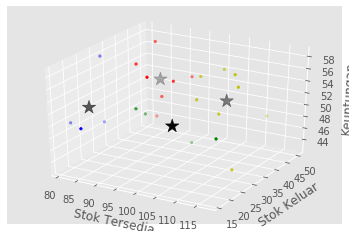

In [20]:
colors= ['r', 'g', 'b', 'y', 'c', 'm']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
result=[]
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        result.append(np.average(points[:,1]*points[:,2]/points[:,0]))
        print(result)
        ax.scatter(points[:, 0], points[:, 1],points[:, 2], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1],C[:, 2], marker='*', s=200, c='#050505')
ax.set_xlabel('Stok Tersedia')
ax.set_ylabel('Stok Keluar')
ax.set_zlabel('Keuntungan')

In [21]:
#Auto labeled k-means
produk1=[]
produk2=[]
produk3=[]
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        produk_cluster = np.array([produk[k] for k in range(len(produk)) if clusters[k] == i])
        if np.min(result)==np.average(points[:,1]*points[:,2]/points[:,0]):
            produk1=produk_cluster
        elif np.max(result)==np.average(points[:,1]*points[:,2]/points[:,0]):
            produk3=produk_cluster
        else:
            produk2=produk_cluster

In [22]:
print("produk1")
print(produk1)
print("produk2")
print(produk2)
print("produk3")
print(produk3)

produk1
['Habbatussauda Oil 200 Kapsul' 'Habbatussauda Al-Afiat 200 Kps'
 'Madu for Mama Al Mabruroh' 'Madu Hutan Sialang 1 Kg']
produk2
['Habbatussauda Extra Propolis Trigon' 'Habbatussauda Al-Afiat 100 Kps'
 'Habbatussauda Oil Al-Afiat 100 Kps' 'Habbatussauda Oil Al-Afiat 200 Kps'
 'Propolis Diamond Regular / Botol' 'Propolis Melia Nature / Botol'
 'Madu Al-Kautsar' 'Madu Hutan Liar Al Wadey 500 Gram']
produk3
['Habat Oil 369' 'Habbatussauda Oil Al-Afiat 60 Kps'
 'Propolis Brazalian / Botol' 'Propolis Diamond Lite 20 / Botol'
 'Propolis Prosmart/ Botol' 'Madu Batuk Al-Wadey'
 'Madu Hitam Pahit 460 gram']
